In [1]:
import plotly.express as px
import pandas as pd

In [2]:
#---------------------------------------------------
#
# Config *** TO UPDATE ***
#
#---------------------------------------------------

# *** TO UPDATE: change the team number with your own team number
TEAM_NUMBER = "TeamDemo"

# File with AOIS definitions 
AOIS_DEFINITION_FILE = "../raw-data/"+TEAM_NUMBER+"/aois definitions/aois.csv"

# This file should be automatically generated from "5. AOI Visits"
DWELLS_FILE = "data/dwells.csv"

In [3]:
#----------------------------------------------------------------------------------------
#
# 1. AOI Sequence Charts
#
#----------------------------------------------------------------------------------------

In [4]:
# Read aois definition
aois_df = pd.read_csv(AOIS_DEFINITION_FILE)

In [5]:
# Display aois definition
display(aois_df)

,AOI,p1x,p1y,p2x,p2y,task
0,Chat,1548.984881,676.457883,1683.110151,737.105832,Slide1
1,CTA_1,287.041037,443.196544,506.306695,508.509719,Slide1
2,Date_Place_1,192.570194,846.738661,488.812095,957.537797,Slide1
3,Date_Place_2,757.062635,87.473002,1045.140389,169.114471,Slide1
4,Description_1,191.403888,968.034557,584.449244,1042.678186,Slide1
5,Description_2,757.062635,177.278618,1167.602592,319.568035,Slide1
6,Fav,1365.874730,675.291577,1524.492441,733.606911,Slide1
7,Food,155.248380,88.639309,636.933045,435.032397,Slide1
8,Gen_Info,193.736501,523.671706,495.809935,600.647948,Slide1
9,Ingredients,757.062635,337.062635,989.157667,669.460043,Slide1


In [6]:
# get list of AOIs to plot
aoisToPlot = aois_df["AOI"].tolist()
print(f'AOIs: {aoisToPlot}')

AOIs: ['Chat', 'CTA_1', 'Date_Place_1', 'Date_Place_2', 'Description_1', 'Description_2', 'Fav', 'Food', 'Gen_Info', 'Ingredients', 'Instructions', 'Online', 'Participants_Overview', 'Participant_Bio', 'Participant_Profile_Picture', 'Place', 'Responsabilities', 'Status', 'Verified']


In [7]:
# Read dwells data using pandas library
data = pd.read_csv(DWELLS_FILE)

# set display.max_columns to none, to show all the columns when using head()
pd.set_option('display.max_columns', None)

In [8]:
#Preview dwell data
data.head()

,Respondent,SourceStimuliName,VisitedAOI,Dwell Start,Dwell End,Number of Fixations in Dwell,Number of Saccades in Dwell,Dwell Time
0,P01,Slide1,Responsabilities,117.4537,375.7792,1,0,258.3255
1,P01,Slide1,CTA_1,742.4064,1100.6684,2,4,358.2620
2,P01,Slide1,Food,1200.7011,1567.3256,1,1,366.6245
3,P01,Slide1,Food,1783.9405,2333.8938,2,4,549.9533
4,P01,Slide1,Food,3658.7234,3867.0633,1,1,208.3399


In [19]:
#plot AOI Sequences

# Keep only visits within the aoisToPlot
dataToPlot = data[data['VisitedAOI'].isin(aoisToPlot)].copy(deep=True)

# We check and cast them directly to numeric without coercing them into NaN
if dataToPlot['Dwell Start'].dtype == 'object':
    dataToPlot['Dwell Start'] = pd.to_numeric(dataToPlot['Dwell Start'], errors='raise')

if dataToPlot['Dwell End'].dtype == 'object':
    dataToPlot['Dwell End'] = pd.to_numeric(dataToPlot['Dwell End'], errors='raise')

# Convert to datetime with unit='ms' knowing they're numeric
dataToPlot['Dwell Start'] = pd.to_datetime(dataToPlot['Dwell Start'], unit='ms')
dataToPlot['Dwell End'] = pd.to_datetime(dataToPlot['Dwell End'], unit='ms')


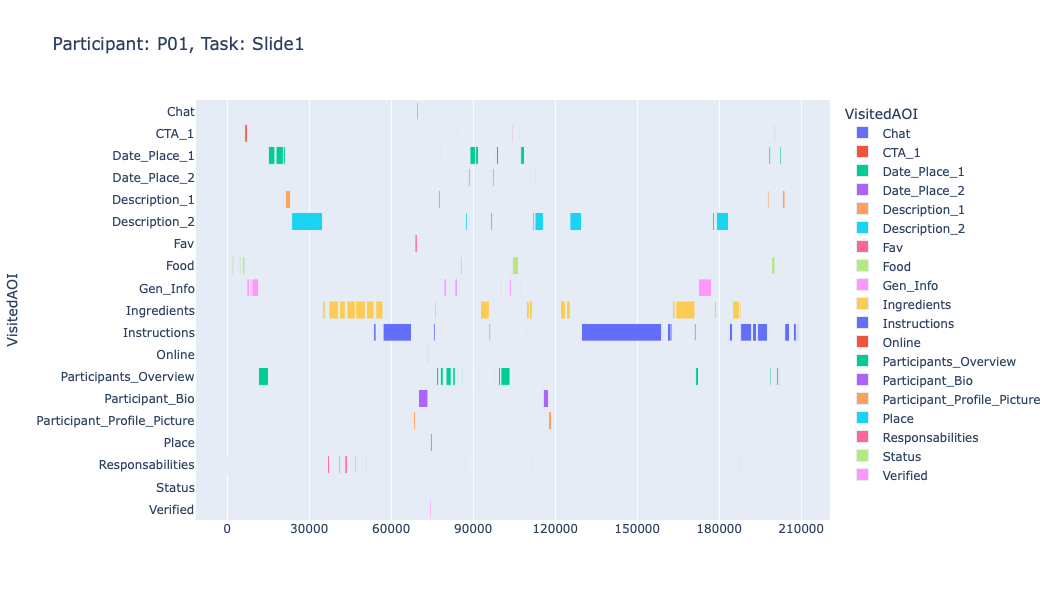

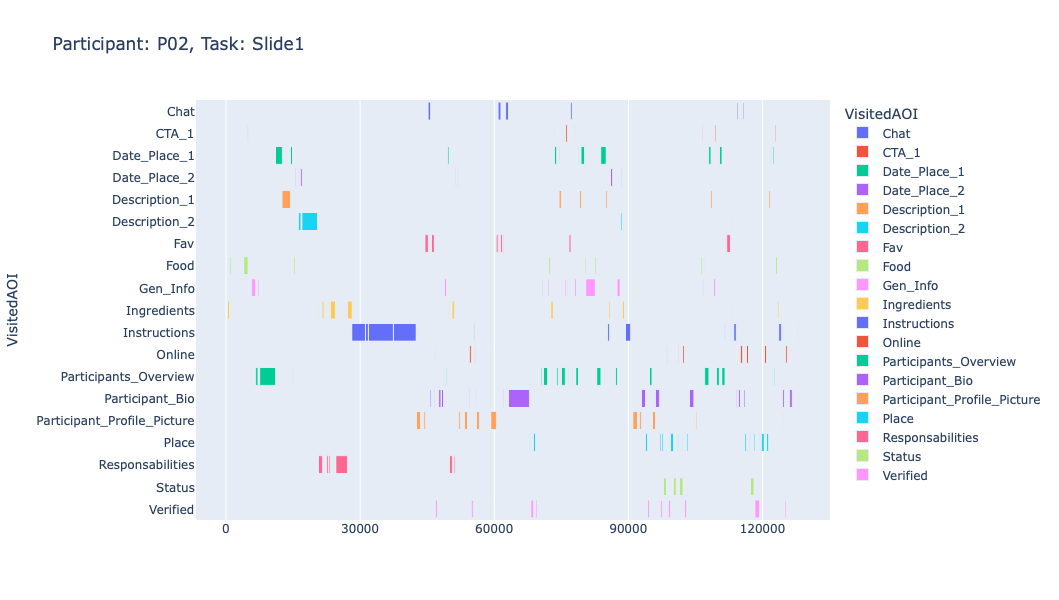

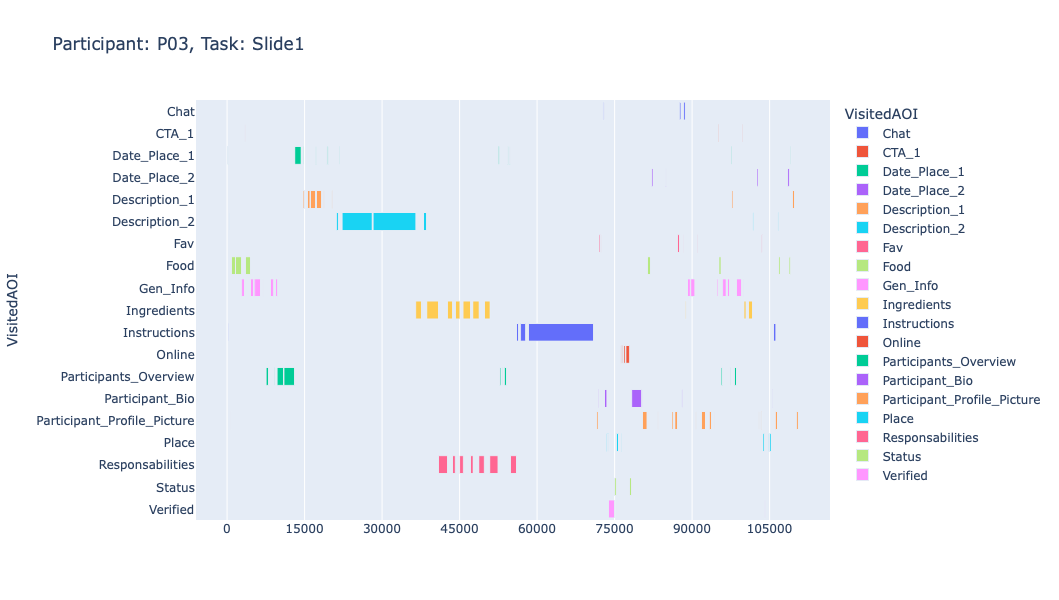

In [20]:
color_discrete_map = None

# Iteratate over the participants and tasks and plot AOI sequences
for participant in dataToPlot['Respondent'].unique():
    
    for task in dataToPlot['SourceStimuliName'].unique():
    
        # Filter in the participant and task data
        participantTaskData = dataToPlot[(dataToPlot['Respondent']==participant) & (dataToPlot['SourceStimuliName']==task)]

        # Plot AOI sequences for the participant data
        fig = None
        # if no colors are assigned yet for the different AOI sequences
        if color_discrete_map is None:
            # Generate a figure with default colors
            fig = px.timeline(participantTaskData, x_start="Dwell Start", x_end="Dwell End", y="VisitedAOI", color="VisitedAOI",  category_orders={"VisitedAOI": [value for value in aoisToPlot]}, title=f'Participant: {participant}, Task: {task}')
            # copy the colors to color_discrete_map in order to reuse them for the other AOI sequence charts
            color_discrete_map = {data.name: data.marker.color for data in fig.data}
        else:
            # Generate a figure with the existing colors in color_discrete_map
            fig = px.timeline(participantTaskData, x_start="Dwell Start", x_end="Dwell End", y="VisitedAOI", color="VisitedAOI",  category_orders={"VisitedAOI": [value for value in aoisToPlot]},  color_discrete_map=color_discrete_map, title=f'Participant: {participant}, Task: {task}')

        fig.update_xaxes(
            tickformat="%Q",  # date format
        ) 

        fig.update_layout(autosize=True,height=600)

        fig.show()